In [ ]:
### Multi variate Linear Regression Analysis. Models Lasso and Ridge. X = Country and Year

In [103]:
import os
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [104]:
data1 = pd.read_csv('../data/literacy_rate_public.csv')
print(f"Shape of the data is: {data1.shape}")
data1.head()

Shape of the data is: (140, 3)


,country,literacyRate,population
0,Afghanistan,43.0,38928346
1,Albania,98.1,2877797
2,Algeria,81.4,43851044
3,Angola,71.1,32866272
4,Australia,99.0,97929


In [105]:
data1.set_index('country')
data1.head()

,country,literacyRate,population
0,Afghanistan,43.0,38928346
1,Albania,98.1,2877797
2,Algeria,81.4,43851044
3,Angola,71.1,32866272
4,Australia,99.0,97929


In [106]:
data2 = pd.read_csv('../data/skill_migration_public.csv')
print(f"Shape of the data is: {data2.shape}")
data2.head()

Shape of the data is: (88085, 9)


,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015


In [107]:
data2.set_index('country')

,country_code,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year
country,,,,,,,,
Afghanistan,af,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015
Afghanistan,af,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015
Afghanistan,af,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015
Afghanistan,af,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015
Afghanistan,af,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015
...,...,...,...,...,...,...,...,...
Zimbabwe,zw,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,-94,2019
Zimbabwe,zw,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,-93,2019
Zimbabwe,zw,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-82,2019


In [108]:
data3 = pd.read_csv('../data/gdp_public.csv')
print(f"Shape of the data is: {data2.shape}")
data3.head()

Shape of the data is: (88085, 9)


,rank,country,gdpPerCapita
0,1,United States,67063.2695
1,2,China,10746.7828
2,3,Japan,43450.1405
3,4,Germany,49617.1450
4,5,India,2360.6592


In [109]:
combined_data1 = pd.merge(data2, data1, on='country', how='inner')
combined_data1

,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year,literacyRate,population
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015,43.0,38928346
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015,43.0,38928346
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015,43.0,38928346
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015,43.0,38928346
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015,43.0,38928346
...,...,...,...,...,...,...,...,...,...,...,...
86560,zw,Zimbabwe,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,-94,2019,86.5,14862924
86561,zw,Zimbabwe,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,-93,2019,86.5,14862924
86562,zw,Zimbabwe,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-82,2019,86.5,14862924
86563,zw,Zimbabwe,Low income,Sub-Saharan Africa,1724,Specialized Industry Skills,Public Health,-32,2019,86.5,14862924


In [110]:
combined_data = pd.merge(combined_data1, data3, on='country', how='inner')
combined_data

,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year,literacyRate,population,rank,gdpPerCapita
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015,43.0,38928346,116,531.2838
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015,43.0,38928346,116,531.2838
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015,43.0,38928346,116,531.2838
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015,43.0,38928346,116,531.2838
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015,43.0,38928346,116,531.2838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84195,zw,Zimbabwe,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,-94,2019,86.5,14862924,108,1736.6704
84196,zw,Zimbabwe,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,-93,2019,86.5,14862924,108,1736.6704
84197,zw,Zimbabwe,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-82,2019,86.5,14862924,108,1736.6704
84198,zw,Zimbabwe,Low income,Sub-Saharan Africa,1724,Specialized Industry Skills,Public Health,-32,2019,86.5,14862924,108,1736.6704


In [11]:
combined_data.dtypes

country_code       object
country            object
income_group       object
world_region       object
skill_group_id      int64
skill_group        object
skill              object
Delta               int64
Year                int64
literacyRate      float64
population          int64
rank                int64
gdpPerCapita      float64
dtype: object

In [113]:
combined_data[combined_data['population'].isnull()==True]

,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year,literacyRate,population,rank,gdpPerCapita


In [177]:
#test=sorted((combined_data['Delta']*(combined_data['population'])/10000))

combined_data['drainOrGain']=combined_data.apply(lambda x:(x['Delta']/10000)*(x['population']/3),axis=1)

In [178]:
len(combined_data[combined_data['drainOrGain'].isnull()==True])

0

In [179]:
combined_data.iloc[0]['drainOrGain']

-1027708.3344000002

In [180]:
combined_data['drainOrGain'] = combined_data['drainOrGain'].astype(int) 

In [182]:
combined_data[combined_data['country']=='Afghanistan'][combined_data['Year']==2019]['drainOrGain'].sum()

-46623135

In [14]:
combined_data.dtypes

country_code       object
country            object
income_group       object
world_region       object
skill_group_id      int64
skill_group        object
skill              object
Delta               int64
Year                int64
literacyRate      float64
population          int64
rank                int64
gdpPerCapita      float64
drainOrGain         int32
dtype: object

In [16]:
len(combined_data.columns)

14

In [23]:
combined_data.isnull().sum()

country_code          0
country               0
income_group          0
world_region          0
skill_group_id        0
skill_group           0
skill                 0
Delta                 0
Year                  0
literacyRate          0
population            0
rank                  0
gdpPerCapita          0
drainOrGainPercent    0
drainOrGain           0
dtype: int64

In [24]:
### Encoding Values for 'Skill Groups', 'Year' and 'Country'

In [17]:
# create dictionaries to map fields to numeric values
#year_values = {'2019': 5, '2018': 4, '2017': 3, '2016': 2, '2015': 1}
#world_regions = {'South Asia': 1, }

# replace values in each column according to the dictionaries above
#combined_data.replace({'Year': year_values}, inplace=True)

# Get dummy variables for nominal property column
clean_data = pd.get_dummies(combined_data, columns=['country', 'skill_group'])
print(clean_data.shape)
clean_data.head()

(84200, 150)


,country_code,income_group,world_region,skill_group_id,skill,Delta,Year,literacyRate,population,rank,...,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,skill_group_Business Skills,skill_group_Disruptive Tech Skills,skill_group_Soft Skills,skill_group_Specialized Industry Skills,skill_group_Tech Skills
0,af,Low income,South Asia,2549,Information Management,-792,2015,43.0,38928346,116,...,0,0,0,0,0,0,0,0,0,1
1,af,Low income,South Asia,2608,Operational Efficiency,-1610,2015,43.0,38928346,116,...,0,0,0,0,0,1,0,0,0,0
2,af,Low income,South Asia,3806,National Security,-1731,2015,43.0,38928346,116,...,0,0,0,0,0,0,0,0,1,0
3,af,Low income,South Asia,50321,Software Testing,-958,2015,43.0,38928346,116,...,0,0,0,0,0,0,0,0,0,1
4,af,Low income,South Asia,1606,Navy,-1511,2015,43.0,38928346,116,...,0,0,0,0,0,0,0,0,1,0


In [18]:
clean_data.dtypes

country_code                               object
income_group                               object
world_region                               object
skill_group_id                              int64
skill                                      object
                                            ...  
skill_group_Business Skills                 uint8
skill_group_Disruptive Tech Skills          uint8
skill_group_Soft Skills                     uint8
skill_group_Specialized Industry Skills     uint8
skill_group_Tech Skills                     uint8
Length: 150, dtype: object

In [19]:
X = clean_data.drop(['country_code', 'income_group','world_region','skill_group_id', 'skill', 'literacyRate','Delta', 'rank', 'gdpPerCapita'], axis=1)
y = clean_data["drainOrGain"].values.reshape(-1,1)
print(X.shape, y.shape)

(84200, 141) (84200, 1)


In [20]:
X

,Year,population,drainOrGain,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,...,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,skill_group_Business Skills,skill_group_Disruptive Tech Skills,skill_group_Soft Skills,skill_group_Specialized Industry Skills,skill_group_Tech Skills
0,2015,38928346,-7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2015,38928346,-16,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2015,38928346,-17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2015,38928346,-9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2015,38928346,-15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84195,2019,14862924,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
84196,2019,14862924,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
84197,2019,14862924,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
84198,2019,14862924,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
X.columns

Index(['Year', 'population', 'drainOrGain', 'country_Afghanistan',
       'country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Armenia', 'country_Australia',
       ...
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe', 'skill_group_Business Skills',
       'skill_group_Disruptive Tech Skills', 'skill_group_Soft Skills',
       'skill_group_Specialized Industry Skills', 'skill_group_Tech Skills'],
      dtype='object', length=141)

In [22]:
y=y.ravel()
print(len(y))
y

84200


array([ -7, -16, -17, ...,   0,   0,   0])

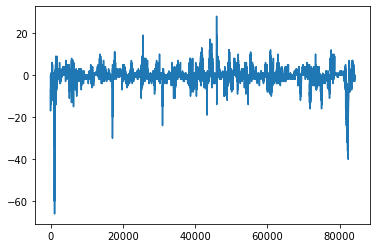

In [23]:
clean_data['drainOrGain'].plot()

In [24]:
### to structure data better
y=y.ravel()

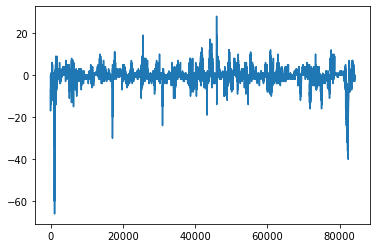

In [25]:
clean_data['drainOrGain'].plot()

In [26]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### END SOLUTION

In [27]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=10)
### END SOLUTION

In [28]:
### BEGIN SOLUTION

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
model.coef_

Training Score: 1.0
Testing Score: 1.0


array([ 9.78253219e-16, -3.41208694e-19,  1.00000000e+00,  1.52077202e-09,
       -2.28066812e-09,  1.39411870e-09, -1.54019359e-09, -2.07504305e-09,
        2.82460011e-09,  5.04769707e-11,  6.06188364e-10, -3.71607608e-10,
        7.60899208e-09,  1.33212798e-09, -2.11940662e-09,  2.31437563e-09,
        1.89218924e-09, -3.73689803e-10,  6.62436255e-09,  7.16423122e-10,
       -5.44695842e-10, -6.90942639e-10, -4.09208287e-10, -4.25519477e-10,
        5.15823930e-09,  3.09208781e-09,  4.50043841e-11,  1.68379243e-09,
        3.90421590e-10,  1.68469863e-10, -1.59149908e-10,  4.50890573e-09,
       -3.26268805e-09,  5.30111035e-10, -3.57526995e-09, -1.85858957e-09,
       -2.53177986e-09, -7.02164079e-10,  7.79568764e-10, -4.08792774e-09,
        5.70852199e-10,  3.29896974e-10, -1.94570819e-09, -2.92419898e-09,
        3.51901568e-11,  5.27902553e-10, -7.83752966e-10,  2.38701771e-10,
        1.48654945e-09, -3.52637227e-09,  2.17345437e-09, -3.26738693e-10,
       -1.40134777e-09, -

Text(0, 0.5, 'Residual')

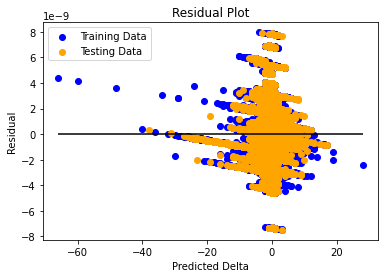

In [29]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.xlabel("Predicted Delta")
plt.ylabel("Residual")
### END SOLUTION

In [45]:
X_train.shape

(63150, 141)

In [73]:
print(X_train.iloc[0].index)
print('X_train[0]: ', X_train.iloc[0].to_frame().transpose().head())
print('Prediction: ', model.predict(X_train.iloc[0].to_frame().transpose()))
print (type(pd.DataFrame(X_train.iloc[0])))

Index(['Year', 'population', 'drainOrGain', 'country_Afghanistan',
       'country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Armenia', 'country_Australia',
       ...
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe', 'skill_group_Business Skills',
       'skill_group_Disruptive Tech Skills', 'skill_group_Soft Skills',
       'skill_group_Specialized Industry Skills', 'skill_group_Tech Skills'],
      dtype='object', length=141)
X_train[0]:         Year  population  drainOrGain  country_Afghanistan  country_Albania  \
28924  2015     9904607           -1                    0                0   

       country_Algeria  country_Angola  country_Argentina  country_Armenia  \
28924                0               0                  0                0   

       country_Australia  ...  country_Venezuela  country_Vietnam  \
28924                  0  ...                  0                0   

 

In [75]:
y_train[:5]

array([-1,  1,  0,  0, -2])

In [78]:
sorted(model.predict(X_train[X_train['country_India']==1]))

[-3.999389362661191,
 -3.999389362661191,
 -3.999389362661191,
 -3.999389362661191,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -2.99957092974515,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968291085,
 -1.9997524968

In [46]:
y_train.shape

(63150,)

In [30]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge()

param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 2, 5]}

In [31]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(Ridge_model, param_grid=param_grid, cv=3, verbose=2)

In [32]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... alpha=0.001, total=   0.4s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.4s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.4s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.4s
[CV] alpha=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.9s finished


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5]}, verbose=2)

In [33]:
grid.best_params_

{'alpha': 0.001}

In [34]:
grid.score(X_test, y_test)

1.0

In [35]:
from sklearn.linear_model import Lasso

Lasso_model = Lasso()

param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 2, 5]}

In [36]:
from sklearn.model_selection import GridSearchCV

lasso_grid = GridSearchCV(Lasso_model, param_grid=param_grid, cv=3, verbose=2)

In [37]:
lasso_grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... alpha=0.001, total=   0.4s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.5s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.3s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.3s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.5s
[CV] alpha=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.4s finished


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5]}, verbose=2)

In [38]:
lasso_grid.best_params_

{'alpha': 0.001}

In [39]:
lasso_grid.score(X_test, y_test)

0.9999999670725291

In [40]:
import pickle

with open('../models/LS_model.pkl','wb') as f:
    pickle.dump(lasso_grid, f)

In [42]:
with open('../models/LS_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [49]:
with open('../models/LS_model_columns.txt', 'wb') as g:
    pickle.dump(X_test.columns, g )

In [50]:
with open('../models/LS_model_columns.txt', 'rb') as g:
    modelColumns = pickle.load(g)

In [53]:
for i in range(5):
    print(modelColumns[i])
modelColumns.shape

Year
population
drainOrGain
country_Afghanistan
country_Albania


(141,)

In [51]:
print(f"Test set score: {model.score(X_test, y_test)}")

Test set score: 0.9999999670725291


In [44]:
model

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5]}, verbose=2)